In [4]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
import xgboost as xgb 

warnings.filterwarnings("ignore")
df = pd.read_csv("hcvdat0.csv")
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [3]:
# elimina la columna ‘Unnamed: 0’.
df.drop(columns = "Unnamed: 0",  inplace = True)
#Reemplazando los valores de la columna sex
df["Sex"] = df["Sex"].replace({"m": 0, "f": 1})
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,64,1,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,46,1,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


b. codifica la variable objetivo Category en dos categorías: una para
Category=’0=Blood Donor’, a la que debes asociar valor 0, y un 1 para los
demás valores. Asigna estos valores en una nueva columna llamada target.

In [5]:
# Crear variables para la columna Category
dummies = pd.get_dummies(df["Category"])

# Asignar valor 0 a '0=Blood Donor' y 1 a todas las demás categorías
df["target"] = dummies["0=Blood Donor"]
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,target
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,True
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,True
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,True
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,True
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,False
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,False
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,False
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,False


c. codifica en otra columna, con nombre suspect, con valor 1 cuando
Category=’0s=suspect Blood Donor’, y aigna 0 en caso contrario. Elimina
finalmente la columna Category.


In [6]:
# Codificar la columna "suspect"
df["suspect"] = np.where(df["Category"] == "0s=suspect Blood Donor", 1, 0)

# Eliminar la columna "Category"
df.drop(columns = ["Category"], inplace = True)
df

,Unnamed: 0,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,target,suspect
0,1,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,True,0
1,2,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,True,0
2,3,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,True,0
3,4,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,True,0
4,5,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,False,0
611,612,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,False,0
612,613,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,False,0
613,614,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,False,0


d. Revisa si la base de datos contiene valores ausentes. En caso que sea así,
aplica los siguientes criterios:
i. si el porcentaje de valores ausentes para alguna variable es menor a
1%, entonces elimina las filas que contengan estos valores ausentes
ii. si el porcentaje de valores ausentes es mayor, entonces reemplaza
estos por el promedio según la clase a la que pertenezca el valor
ausente.

In [7]:
# Ver si tiene valores nulos
df.isnull().sum()

Unnamed: 0     0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
target         0
suspect        0
dtype: int64

In [8]:
#si el porcentaje de valores ausentes para alguna variable es menor a
#1%, entonces elimina las filas que contengan estos valores ausentes
def val_ausente_25 (df, valor = 0.01):
    # valores nulos para cada columna
    porcent_valores_ausentes = df.isnull().mean(axis=1)
    # columnas con un porcentaje de valores nulos mayor al 1% y descartando los atributos identificados
    df_filtrado = df[porcent_valores_ausentes <= valor]
    return df_filtrado

#ii. si el porcentaje de valores ausentes es mayor, entonces reemplaza
#estos por el promedio según la clase a la que pertenezca el valor
#ausente

df_filtrado = val_ausente_25(df)


def reemplazar_valores_ausentes_con_promedio(df):
    # Iterar sobre cada columna del df
    for columna in df.columns:
        # Verificar si la columna tiene valores nulos
        if df[columna].isnull().any():
            # Calcular el promedio de la columna
            promedio_columna = df[columna].mean()
            # Llenar los valores nulos con el promedio de la columna
            df[columna].fillna(promedio_columna, inplace = True)
    
    return df

# Llamar a la función para reemplazar los valores nulos con el promedio de cada columna
df_filtrado = reemplazar_valores_ausentes_con_promedio(df_filtrado)
df_filtrado

,Unnamed: 0,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,target,suspect
0,1,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,True,0
1,2,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,True,0
2,3,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,True,0
3,4,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,True,0
4,5,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,609,58,f,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6,False,0
609,610,59,f,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5,False,0
610,611,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,False,0
611,612,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,False,0


In [9]:
df_filtrado.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
target        0
suspect       0
dtype: int64

e. Realiza un análisis descriptivo para cada variable regresora, usando gráficos
para representar distribuciones y boxplot para revisar posibles outliers.
Construye un heatmap que muestre las correlaciones entre las variables
regresoras y describe.

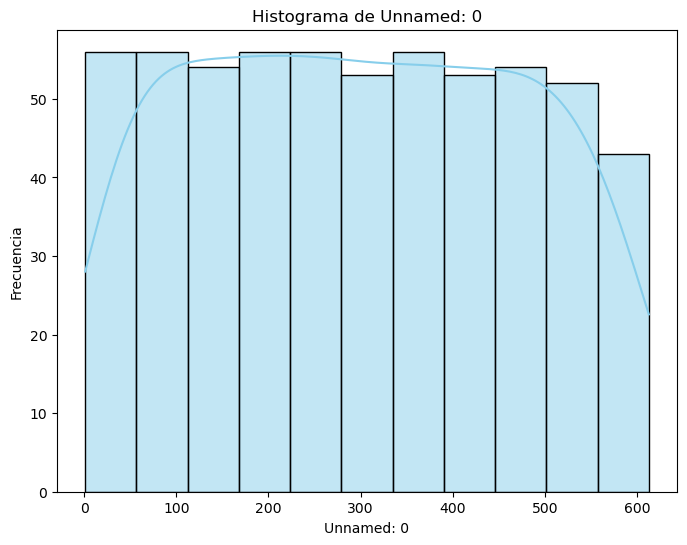

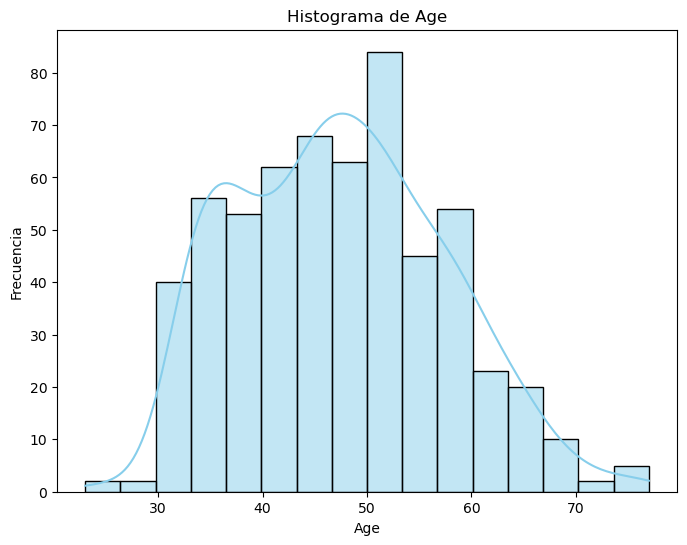

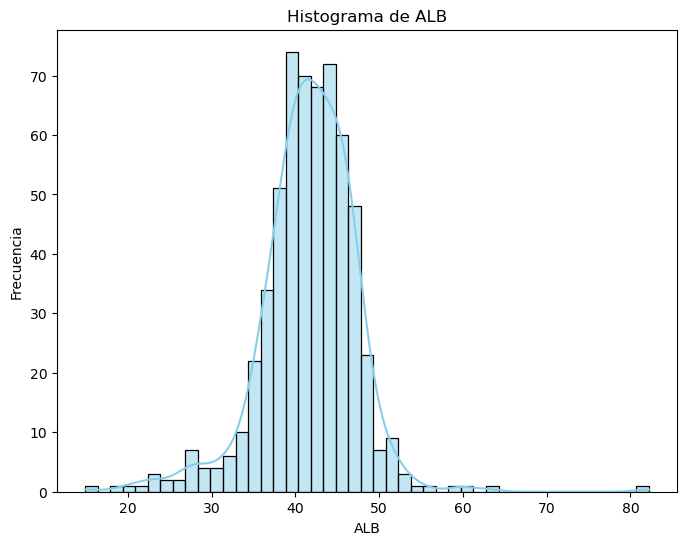

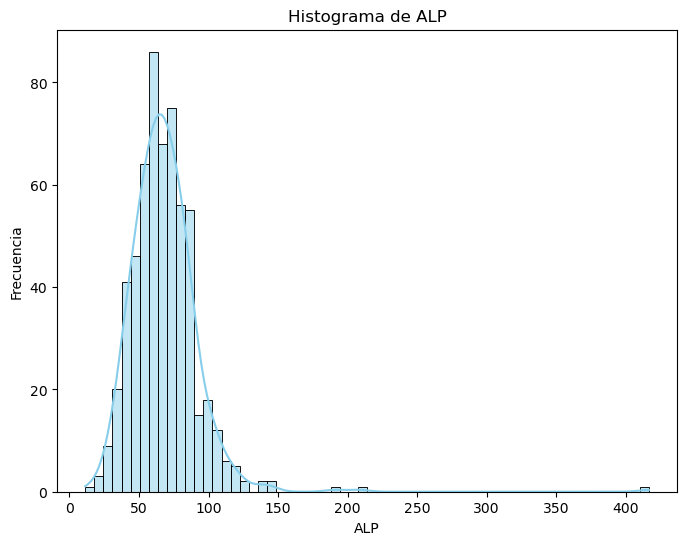

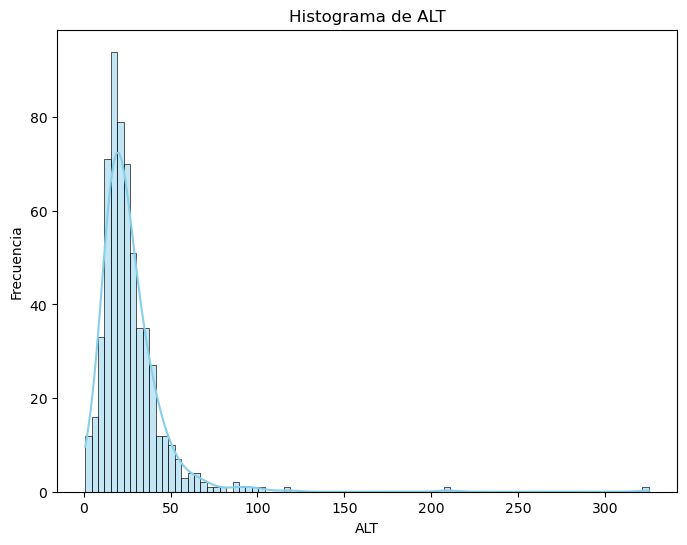

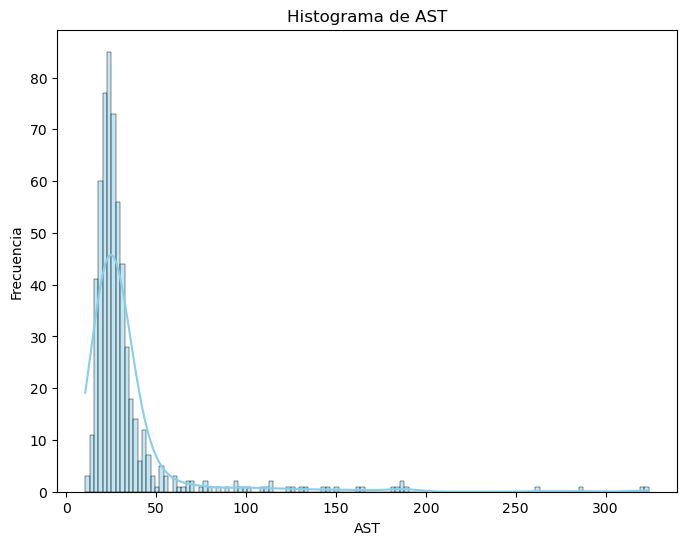

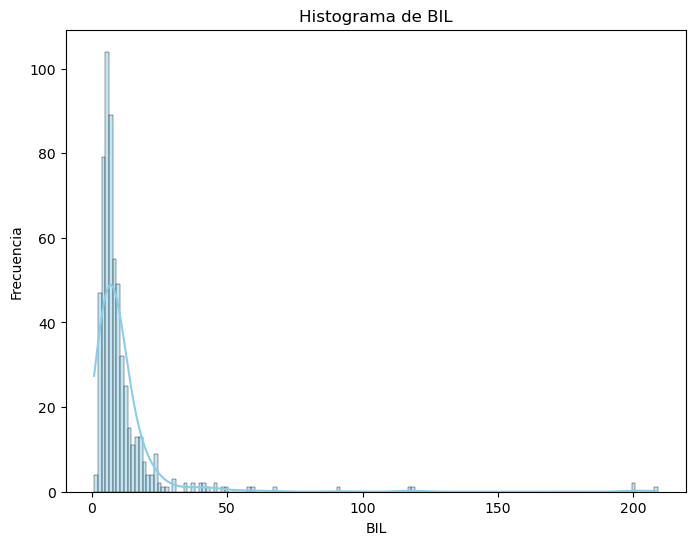

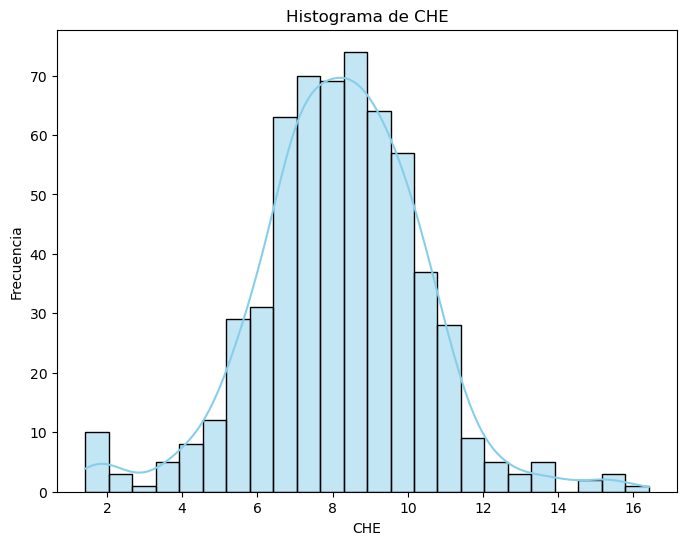

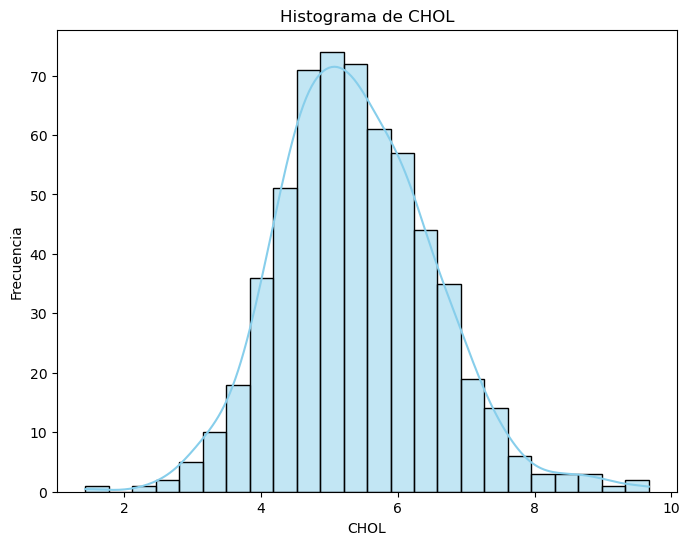

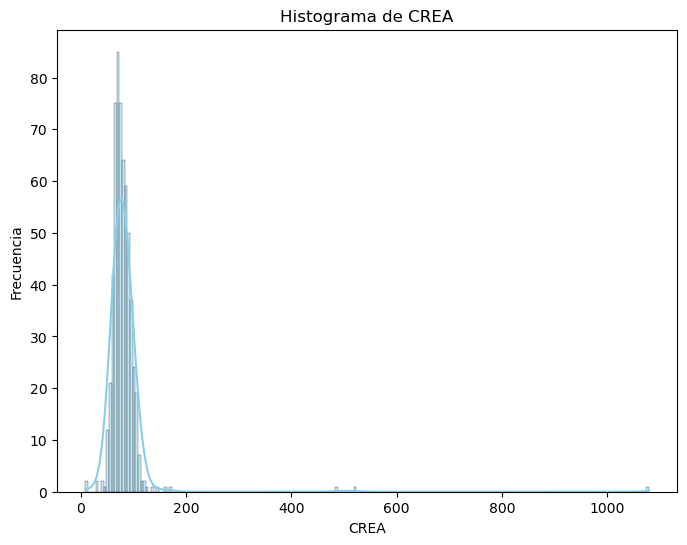

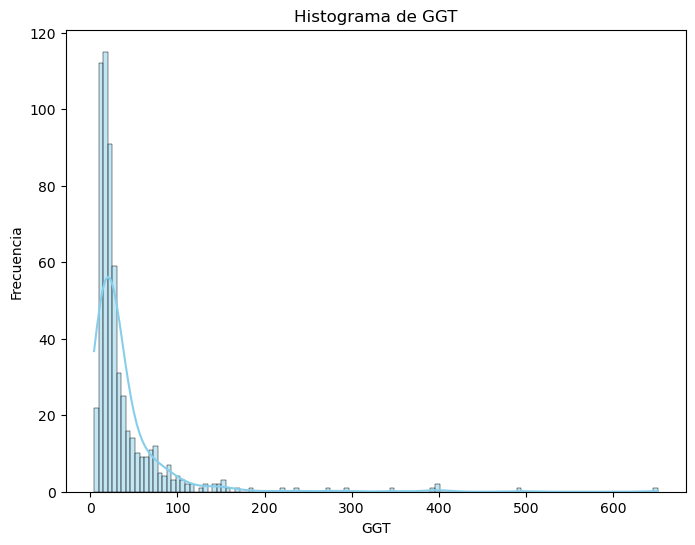

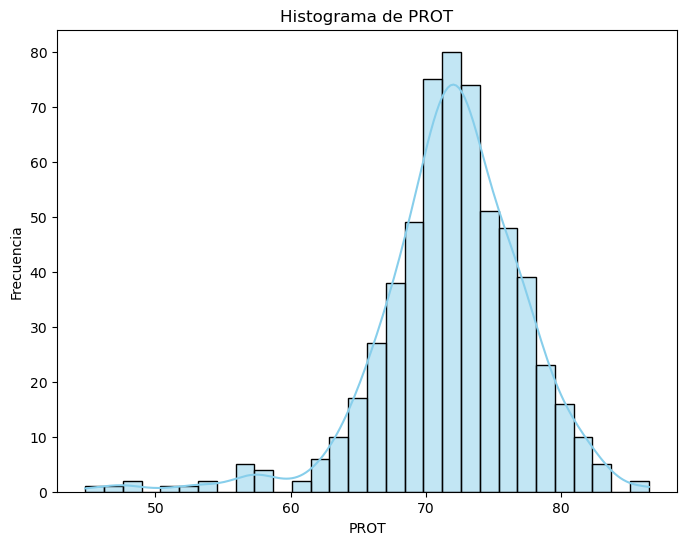

In [10]:
def analisis_descriptivo(df):
    # Histogramas para variables numéricas
    numeric_columns = df.select_dtypes(include = ["float64", "int64"]).columns
    for column in numeric_columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[column], kde=True, color = "skyblue")
        plt.title(f"Histograma de {column}")
        plt.xlabel(column)
        plt.ylabel("Frecuencia")
        plt.show()
analisis_descriptivo(df_filtrado) 

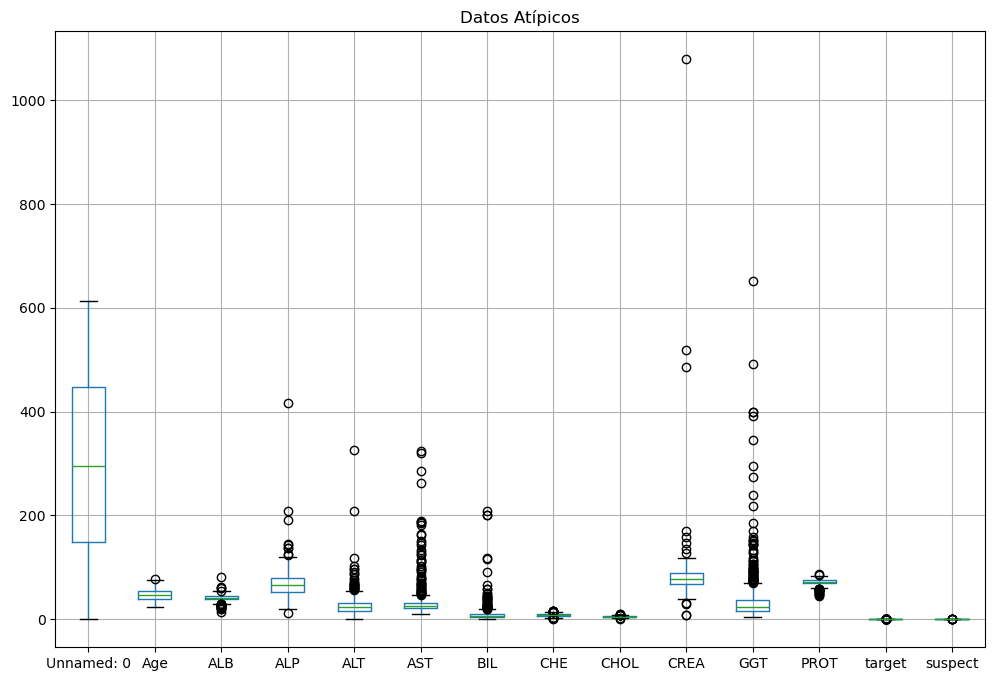

In [11]:
plt.figure(figsize = (12, 8))
df_filtrado.boxplot()
plt.title("Datos Atípicos")
plt.show()

In [15]:
df_filtrado.dtypes

Unnamed: 0      int64
Age             int64
Sex            object
ALB           float64
ALP           float64
ALT           float64
AST           float64
BIL           float64
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
PROT          float64
target           bool
suspect         int32
dtype: object

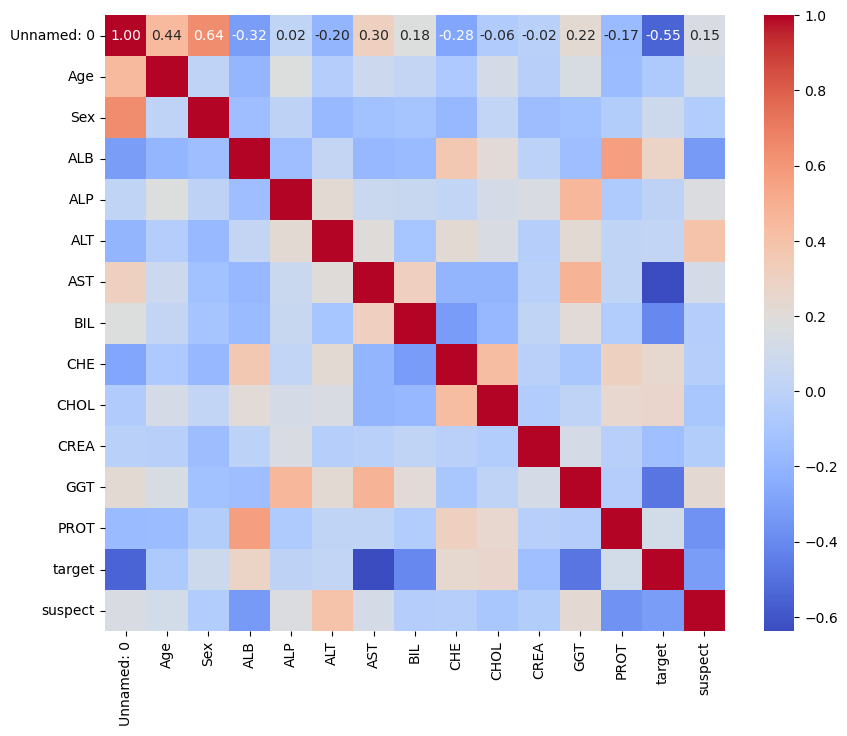

In [16]:
# Convertir 'Sex' a valores numéricos
df_filtrado['Sex'] = df_filtrado['Sex'].map({'m': 0, 'f': 1})

# Calcular la correlación
correlation_matrix = df_filtrado.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [17]:
df_filtrado.corr()

,Unnamed: 0,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,target,suspect
Unnamed: 0,1.000000,0.443058,0.635232,-0.315205,0.017944,-0.200233,0.303603,0.176511,-0.278535,-0.057947,-0.020163,0.221463,-0.166482,-0.546893,0.150234
Age,0.443058,1.000000,0.014288,-0.191094,0.177720,-0.040576,0.072739,0.039655,-0.075863,0.124742,-0.025142,0.143379,-0.159760,-0.070688,0.112222
Sex,0.635232,0.014288,1.000000,-0.150091,0.007601,-0.177107,-0.129883,-0.108063,-0.181649,0.030447,-0.158068,-0.128142,-0.043296,0.081032,-0.054316
ALB,-0.315205,-0.191094,-0.150091,1.000000,-0.146120,0.039497,-0.177609,-0.169597,0.360919,0.210420,0.001433,-0.147598,0.570726,0.282954,-0.328125
ALP,0.017944,0.177720,0.007601,-0.146120,1.000000,0.221603,0.067024,0.058372,0.029482,0.125900,0.153909,0.461300,-0.063085,0.004487,0.165895
ALT,-0.200233,-0.040576,-0.177107,0.039497,0.221603,1.000000,0.198658,-0.106797,0.224344,0.149997,-0.036106,0.219707,0.016786,0.031636,0.397418
AST,0.303603,0.072739,-0.129883,-0.177609,0.067024,0.198658,1.000000,0.309580,-0.197270,-0.201213,-0.017948,0.477774,0.017404,-0.638364,0.124325
BIL,0.176511,0.039655,-0.108063,-0.169597,0.058372,-0.106797,0.309580,1.000000,-0.320713,-0.181570,0.019910,0.210567,-0.052575,-0.406717,-0.039931
CHE,-0.278535,-0.075863,-0.181649,0.360919,0.029482,0.224344,-0.197270,-0.320713,1.000000,0.428018,-0.012120,-0.095716,0.306288,0.241315,-0.036251
CHOL,-0.057947,0.124742,0.030447,0.210420,0.125900,0.149997,-0.201213,-0.181570,0.428018,1.000000,-0.051464,0.008823,0.245050,0.263781,-0.091383


Edad y Género: La edad muestra una correlación positiva moderada con el género y una correlación moderada con una variable no identificada. Esto sugiere una relación entre la edad y el género en tus datos.
Enzimas Hepáticas: Las enzimas hepáticas (ALB, ALP, ALT, AST, GGT) muestran correlaciones entre sí, lo que indica cierta interrelación en sus niveles en el sujeto de estudio.
Variables de Interés: La variable "target" (objetivo) muestra correlaciones moderadas a fuertes con varias variables, incluyendo ALB, AST, BIL, CHE, GGT y PROT. Estas variables podrían ser importantes predictores o indicadores del objetivo de tu análisis.
Correlaciones Inversas: Hay una correlación negativa moderada entre "target" y una variable no identificada, lo que sugiere una relación inversa entre ellas.
Variables Sospechosas: La variable "suspect" (sospechoso) muestra correlaciones débiles a moderadas con varias otras variables, incluyendo ALT, AST, GGT, CREA y ALB. Esto sugiere cierta relación entre estas variables y la condición de "sospechoso".

f. Transforma las variables regresoras por medio de la estandarización.
Muestra el antes y después de esta usando boxplots, y realiza una
segmentación de la muestra en 33% para test y el resto para entrenamien

In [18]:
X = df_filtrado.drop(columns = ["target", "suspect"])
y = df_filtrado["target"]

# Guardar los nombres de las columnas
columnas = X.columns

# 1. Estandarizar las variables regresoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

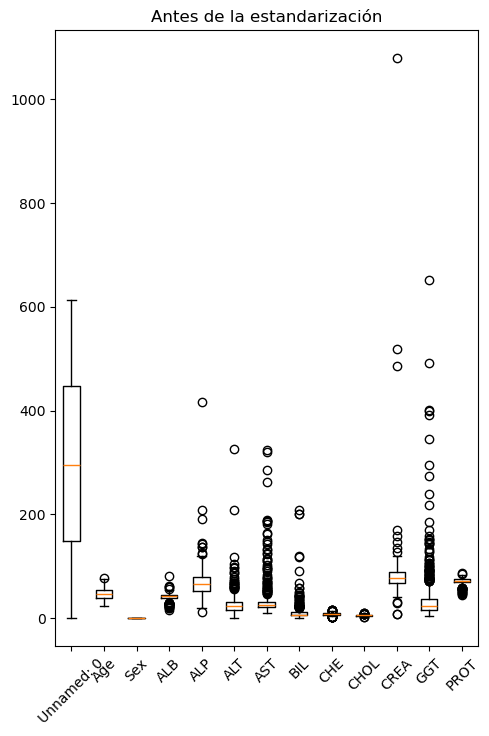

In [19]:
# 2. Mostrar los boxplots antes y después de la estandarización

# Boxplots antes de la estandarización
plt.figure(figsize = (12, 8))
plt.subplot(1, 2, 1)
plt.boxplot(X.values, labels = X.columns)
plt.title("Antes de la estandarización")
plt.xticks(rotation=45)
plt.show()

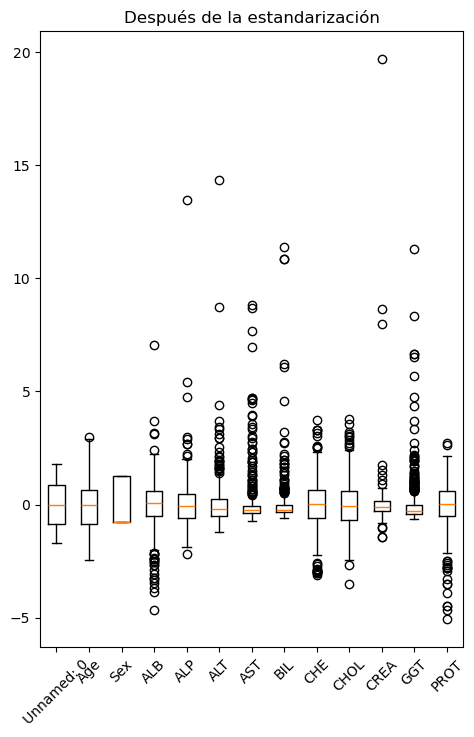

In [20]:
# Boxplots después de la estandarización
plt.figure(figsize = (12, 8))
plt.subplot(1, 2, 2)
plt.boxplot(X_scaled, labels=X.columns)
plt.title("Después de la estandarización")
plt.xticks(rotation=45)

plt.show()

In [21]:
# Segmentar la muestra en 33% para pruebas y el resto para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.33, random_state = 42)

2. Desarrolla un modelo regresión logística con validación cruzada usando 5-fold, con
regularización Elastic Net. Busca para los siguientes hiper parámetros:
● Cs: valores entre 0.01 y 5.0, con 200 valores lineales.
● l1_ratio: valores entre 0 y 1, con 200 valores lineales.
Muestra los valores óptimos encontrados, y las métricas precisión, recall, f1-score y
accuracy. Describe cuáles son las tres características con mayor incidencia en la
predicción de sujeto o muestra con sangre con posible enfermedad.

In [22]:
param_grid = {
    'C': np.linspace(0.01, 5.0, 200),
    'l1_ratio': np.linspace(0, 1, 200)
}

# Modelo LogisticRegression
model_LR = LogisticRegression(
    penalty = "elasticnet", # Regularización Elastic Net
    solver = "saga",          # Solver compatible con Elastic Net
    random_state = 42         # Semilla aleatoria para reproducibilidad
)

grid_search_LR = GridSearchCV(model_LR, param_grid, cv = 5, scoring = "accuracy")
grid_search_LR.fit(X_train, y_train)

best_params_LR = grid_search_LR.best_params_

# Obtener predicciones y métricas para Logistic Regression
y_pred_LR = grid_search_LR.predict(X_test)
print("Logistic Regression Classifier:")
print("Mejores parametros:", best_params_LR)
print("Accuracy:", accuracy_score(y_test, y_pred_LR))
print(classification_report(y_test, y_pred_LR))

Logistic Regression Classifier:
Mejores parametros: {'C': 0.5115075376884423, 'l1_ratio': 0.8542713567839196}
Accuracy: 0.9743589743589743
              precision    recall  f1-score   support

       False       1.00      0.81      0.89        26
        True       0.97      1.00      0.99       169

    accuracy                           0.97       195
   macro avg       0.99      0.90      0.94       195
weighted avg       0.98      0.97      0.97       195



 el modelo de regresión logística parece funcionar bastante bien en este conjunto de datos, con altos niveles de precisión y recall en ambas clases. Sin embargo, puede ser útil investigar más a fondo el bajo recall para la clase "False" para comprender mejor por qué el modelo tiene dificultades para identificar estas instancias.

<BarContainer object of 3 artists>

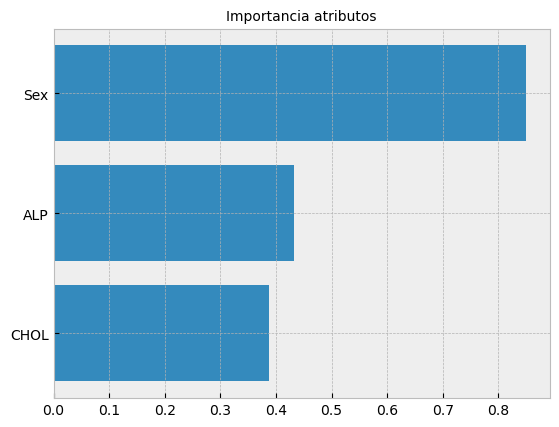

In [23]:
# Graficar la importancia de los atributos (3 mas importantes)
plt.style.use('bmh')

df_importance = pd.DataFrame({
    "atributo": columnas, #nombre de las columnas
    "importancia": grid_search_LR.best_estimator_.coef_[0] #Importancia de atributos obtenidos 
}).sort_values(by="importancia", ascending=True)

top_cuatro = df_importance.tail(3)

plt.title("Importancia atributos", fontsize=10)
plt.barh(y=top_cuatro["atributo"], width=top_cuatro["importancia"])

3. Implementa un modelo Extreme Gradient Boosting con búsqueda de hiper
parámetros de grilla, con regularización para la combinación L1 y L2. Considera para
esto:
_ 2
www.desafiolatam.com
a. reg_lambda: valores entre 0.0 y 2.0, con 10 valores lineales.
b. reg_alpha: valores entre 0 y 1, con 10 valores lineales.
c. learning_rate: valores entre 0.1 a 10, con 20 valores lineales.

In [26]:
param_grid = {
    'reg_lambda': np.linspace(0.0, 2.0, 10),
    'reg_alpha': np.linspace(0, 1, 10),
    'learning_rate': np.linspace(0.1, 10, 20)
}

# Modelo XGBClassifier
modelo_xgb = XGBClassifier()

# Parámetros para la búsqueda de la grilla
grid_search_xgb = GridSearchCV(estimator = modelo_xgb, param_grid = param_grid, cv = 5, scoring = "accuracy")

# Búsqueda de la grilla
grid_search_xgb.fit(X_train, y_train)

# Mejores parámetros
best_params_xgb = grid_search_xgb.best_params_

In [ ]:
4. Muestra el nivel de importancia de los atributos, los valores óptimos de los hiper
parámetros y las métricas precisión, recall, f1-score y accuracy. Compara los
resultados de este modelo con el de regresión logística.

In [27]:
# Obtener predicciones y métricas para Extreme Gradient Boosting
y_pred_xgb = grid_search_xgb.predict(X_test)
print("Extreme Gradient Boosting:")
print("Mejores parametros:", best_params_xgb)
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

Extreme Gradient Boosting:
Mejores parametros: {'learning_rate': 0.1, 'reg_alpha': 0.0, 'reg_lambda': 0.0}
Accuracy: 0.9794871794871794
              precision    recall  f1-score   support

       False       1.00      0.85      0.92        26
        True       0.98      1.00      0.99       169

    accuracy                           0.98       195
   macro avg       0.99      0.92      0.95       195
weighted avg       0.98      0.98      0.98       195



 modelo Extreme Gradient Boosting (XGBoost) también muestra un rendimiento muy sólido en este conjunto de datos, con altos niveles de precisión y recall en ambas clases. La tasa de aprendizaje de 0.1 y la falta de regularización parecen ser una buena elección para este conjunto de datos.

<BarContainer object of 3 artists>

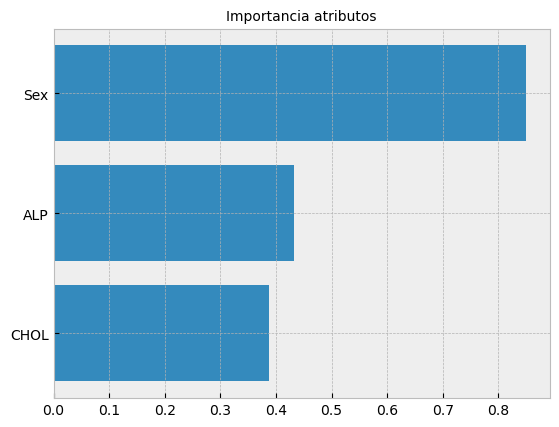

In [28]:
# Graficar la importancia de los atributos
plt.style.use('bmh')

df_importance = pd.DataFrame({
    "atributo": columnas,
    "importancia": grid_search_LR.best_estimator_.coef_[0]
}).sort_values(by="importancia", ascending=True)

top_cuatro = df_importance.tail(3)

plt.title("Importancia atributos", fontsize=10)
plt.barh(y=top_cuatro["atributo"], width=top_cuatro["importancia"])